In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below the parameters (stratification, coriolis, interior velocity and geostrophic scaling factor) are set for the background flow fields. The slope Burger number is varied using the slope angle, $\theta$), but this could easily be changed in code

In [2]:
N2 = 1e-5    # s^-2, interior stratification
f = 1e-4     # s^-1 coriolis parameter
Vinf = 0.1   # m s^-1 interior velocity
delta = 0.5  # geostrophic scaling factor 

Below the background conditions at time t are calculated with only v-shear as initial condition. Note that $\theta$ is calculated for the given slope Burger number, $S_\infty$, and the preset coriolis and stratification parameters. 
The code also can calculate the background velocities for either the upper or lower limit of gamma given an input string.

In [3]:
def shear_osc(t,Sinf,g):
    theta = np.arctan(Sinf*f/N2**(0.5))    # calculate the slope angle
    if g=="gammau":    # if else that calculates gamma at either the upper (gammau) or lower (gammal) limit
        gamma = (np.cos(theta)*(1+(1-delta)*Sinf**2))**(-1)
    elif g=="gammal":
        gamma = (3-Sinf**2)*(np.cos(theta)*(3*(1+Sinf**2)-4*delta*Sinf**2))**(-1)
    vo = N2**(0.5)*Sinf*gamma*delta     # initial v-shear
    fstar = f*np.cos(theta)*(1+Sinf**2)**(0.5)    # modified intertial frequency
    u = (f*np.cos(theta)*vo)/(fstar)*np.sin(fstar*t)    # calculate u-velocity
    v = vo+(f**2*np.cos(theta)**2*vo)/(fstar**2)*(np.cos(fstar*t)-1)    # calculate v-velocity
    N = N2*np.sin(theta)*(f*np.cos(theta)*vo)/(fstar**2)*(np.cos(fstar*t)-1)    # calculate buoyancy anomaly
    return [u,v,N]

In [4]:
def shear_osc_JH(t,Sinf,g):
    theta = np.arctan(Sinf*f/N2**(0.5))    # calculate the slope angle
    if g=="gammau":    # if else that calculates gamma at either the upper (gammau) or lower (gammal) limit
        gamma = (np.cos(theta)*(1+(1-delta)*Sinf**2))**(-1)
    elif g=="gammal":
        gamma = (3-Sinf**2)*(np.cos(theta)*(3*(1+Sinf**2)-4*delta*Sinf**2))**(-1)
    vo = N2**(0.5)*Sinf*gamma*delta     # initial v-shear
    fstar = f*np.cos(theta)*(1+Sinf**2)**(0.5)    # modified intertial frequency
    u = vo*np.sin(fstar*t)  # calculate u-velocity
    v = f*np.cos(theta)/fstar*vo*np.cos(fstar*t)    # calculate v-velocity
    N = N2*np.sin(theta)/fstar*vo*np.cos(fstar*t)     # calculate buoyancy anomaly
    return [u,v,N]

In [5]:
def shear_osc_gen(t,Sinf,g,phi):
    theta = np.arctan(Sinf*f/N2**(0.5))    # calculate the slope angle
    if g=="gammau":    # if else that calculates gamma at either the upper (gammau) or lower (gammal) limit
        gamma = (np.cos(theta)*(1+(1-delta)*Sinf**2))**(-1)
    elif g=="gammal":
        gamma = (3-Sinf**2)*(np.cos(theta)*(3*(1+Sinf**2)-4*delta*Sinf**2))**(-1)
    vo = N2**(0.5)*Sinf*gamma*delta     # initial v-shear
    fstar = f*np.cos(theta)*(1+Sinf**2)**(0.5) 
    beta = (1+Sinf**2)**(0.5) 
    u = 0.5*vo*(1+beta**(-1))*np.cos(fstar*t-phi)+0.5*vo*(1-beta**(-1))*np.cos(fstar*t+phi)
    v = vo*(1-beta**(-2))-0.5*vo*(beta**(-1)+beta**(-2))*np.sin(fstar*t-phi)+0.5*vo*(beta**(-2)-beta**(-1))*np.sin(fstar*t+phi)
    N = -vo*N2*np.sin(theta)*fstar**(-1)*beta**(-1)*np.sin(phi)-0.5*vo*N2*np.sin(theta)*fstar**(-1)*(beta**(-1)+1)*np.sin(fstar*t-phi)+0.5*vo*N2*np.sin(theta)*fstar**(-1)*(beta**(-1)-1)*np.sin(fstar*t+phi)
    return [u,v,N]

Below we calculate the background flow fields for slope Burger number values of 0.1, 0.5, 1, 1.5, and 2 at the upper limit of gamma. $\theta$ is precalculated and saved along with the inertial frequency as they are utilized to calculate the time interval and later in plots of background flow over a single period.

In [6]:
Sinf1 = 0.1   # slope Burger number
theta1 = np.arctan(Sinf1*f/N2**(0.5))   # slope angle
fstar1 = f*np.cos(theta1)*(1+Sinf1**2)**(0.5)    # modified inertial frequency
t1 = np.linspace(0,2*np.pi/fstar1,50)    # time domain
u1,v1,b1 = shear_osc(t1, Sinf1, "gammau")   # background flow variables

In [7]:
Sinf2 = 0.5
theta = np.arctan(Sinf2*f/N2**(0.5))
fstar2 = f*np.cos(theta)*(1+Sinf2**2)**(0.5)
t2 = np.linspace(0,2*np.pi/fstar2,50)
u2,v2,b2 = shear_osc(t2, Sinf2, "gammau")

In [8]:
Sinf3 = 1
theta3 = np.arctan(Sinf3*f/N2**(0.5))
fstar3 = f*np.cos(theta3)*(1+Sinf3**2)**(0.5)
t3 = np.linspace(0,2*np.pi/fstar3,50)
u3,v3,b3 = shear_osc(t3, Sinf3, "gammau")

In [9]:
Sinf3 = 1
theta3 = np.arctan(Sinf3*f/N2**(0.5))
fstar3 = f*np.cos(theta3)*(1+Sinf3**2)**(0.5)
t3 = np.linspace(0,2*np.pi/fstar3,50)
u3a,v3a,b3a = shear_osc_JH(t3, Sinf3, "gammau")

In [10]:
u3b,v3b,b3b = shear_osc_gen(t3, Sinf3, "gammau",np.pi/2)

In [11]:
from scipy.integrate import odeint

In [12]:
def num_sol(y,t,theta):
    u,v,b = y
    dydt = [f*np.cos(theta)*v+np.sin(theta)*b,-f*np.cos(theta)*u, -N2*np.sin(theta)*u]
    return dydt

In [13]:
t = np.linspace(0,2*np.pi/fstar3,50)
sol = odeint(num_sol,[0,N2**(0.5)*Sinf3*(np.cos(theta3)*(1+(1-delta)*Sinf3**2))**(-1)*delta, 0],t,args=(theta3,))

In [14]:
sol[:,0]

array([ 0.00000000e+00,  9.53457910e-05,  1.89160718e-04,  2.79853435e-04,
        3.65953389e-04,  4.46043752e-04,  5.18808807e-04,  5.83054026e-04,
        6.37725772e-04,  6.81925848e-04,  7.14928473e-04,  7.36191814e-04,
        7.45365987e-04,  7.42300379e-04,  7.27042727e-04,  6.99846994e-04,
        6.61161274e-04,  6.11619263e-04,  5.52034254e-04,  4.83386094e-04,
        4.06801070e-04,  3.23536964e-04,  2.34959929e-04,  1.42526027e-04,
        4.77519665e-05, -4.78054104e-05, -1.42577624e-04, -2.35007899e-04,
       -3.23578738e-04, -4.06836056e-04, -4.83412273e-04, -5.52050735e-04,
       -6.11623411e-04, -6.61153478e-04, -6.99826188e-04, -7.27008187e-04,
       -7.42251557e-04, -7.45307691e-04, -7.36124976e-04, -7.14855539e-04,
       -6.81847670e-04, -6.37644187e-04, -5.82970506e-04, -5.18724648e-04,
       -4.45961637e-04, -3.65876062e-04, -2.79783339e-04, -1.89095842e-04,
       -9.53040427e-05,  5.14804688e-08])

(-0.0008, 0.0015)

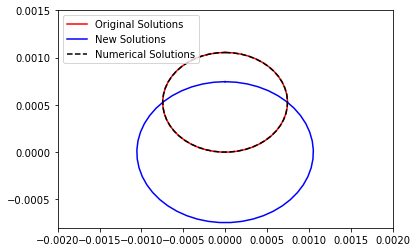

In [27]:
plt.plot(u3,v3,color="r",label="Original Solutions")
plt.plot(u3a,v3a,color="b",label="New Solutions")
plt.plot(sol[:,0],sol[:,1],color="k",label="Numerical Solutions",linestyle="--")
# plt.plot(u3b,v3b,color="c")
plt.legend(loc="upper left")
plt.xlim([-2e-3,2e-3])
plt.ylim([-8e-4,1.5e-3])

In [ ]:
plt.plot(u3,b3,color="b")
plt.plot(u3a,b3a,color="r")
plt.plot(u3b,b3b,color="c")
plt.plot(sol[:,0],sol[:,2],color="k")

In [ ]:
Sinf4 = 1.5
theta = np.arctan(Sinf4*f/N2**(0.5))
fstar4 = f*np.cos(theta)*(1+Sinf4**2)**(0.5)
t4 = np.linspace(0,2*np.pi/fstar4,50)
u4,v4,b4 = shear_osc(t4, Sinf4, "gammau")

In [ ]:
Sinf5 = 2
theta5 = np.arctan(Sinf5*f/N2**(0.5))
fstar5 = f*np.cos(theta5)*(1+Sinf5**2)**(0.5)
t5 = np.linspace(0,2*np.pi/fstar5,50)
u5, v5, b5 = shear_osc(t5, Sinf5, "gammau")

Plots of the hodographs for u vs v and then u vs b for the upper limit of gamma. Note that they are normalized by the initial geostrophic shear

In [ ]:
plt.plot(u1/v1[0],v1/v1[0],color="red",label = "$S_\infty$=0.1")
plt.plot(u2/v2[0],v2/v2[0],color="orange",label = "$S_\infty$=0.5")
plt.plot(u3/v3[0],v3/v3[0],color="green",label = "$S_\infty$=1")
plt.plot(u4/v4[0],v4/v4[0],color="blue",label = "$S_\infty$=1.5")
plt.plot(u5/v5[0],v5/v5[0],color="magenta",label = "$S_\infty$=2")
plt.legend(loc="lower left")
plt.xlabel(r"$\breve{u}$")
plt.ylabel(r"$\breve{v}$")

In [ ]:
plt.plot(u1/v1[0],b1/v1[0]**2,color="red",label = "$S_\infty$=0.1")
plt.plot(u2/v2[0],b2/v2[0]**2,color="orange",label = "$S_\infty$=0.5")
plt.plot(u3/v3[0],b3/v3[0]**2,color="green",label = "$S_\infty$=1")
plt.plot(u4/v4[0],b4/v4[0]**2,color="blue",label = "$S_\infty$=1.5")
plt.plot(u5/v5[0],b5/v5[0]**2,color="magenta",label = "$S_\infty$=2")
plt.legend(loc="lower left")
plt.xlabel(r"$\breve{u}$")
plt.ylabel(r"$\breve{b}$")

Plot the two hodographs previous shown together

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5),sharey=False,sharex=True,constrained_layout=True)
ax[0].plot(u1/np.abs(v1[0]),v1/np.abs(v1[0]),color="red",label = "$S_\infty$=0.1")
ax[0].plot(u2/np.abs(v2[0]),v2/np.abs(v2[0]),color="lime",label = "$S_\infty$=0.5")
ax[0].plot(u3/np.abs(v3[0]),v3/np.abs(v3[0]),color="green",label = "$S_\infty$=1")
ax[0].plot(u4/np.abs(v4[0]),v4/np.abs(v4[0]),color="blue",label = "$S_\infty$=1.5")
ax[0].plot(u5/np.abs(v5[0]),v5/np.abs(v5[0]),color="magenta",label = "$S_\infty$=2")
ax[0].legend(loc="lower left")
ax[0].set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[0].set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[0].text(-1.275,1.1,"(a.)")
ax[0].set_xlabel(r"$\breve{u}/|\delta\Lambda|$",fontsize=12)
ax[0].set_ylabel(r"$\breve{v}/|\delta\Lambda|$",fontsize=12)
ax[0].set_aspect(1)
ax[1].plot(u1/np.abs(v1[0]),delta*b1/(v1[0]**2/(v1[0]/(N2**(0.5)*0.1))),color="red",label = "$S_\infty$=0.1")
ax[1].plot(u2/np.abs(v2[0]),delta*b2/(v2[0]**2/(v2[0]/(N2**(0.5)*0.5))),color="lime",label = "$S_\infty$=0.5")
ax[1].plot(u3/np.abs(v3[0]),delta*b3/(v3[0]**2/(v3[0]/(N2**(0.5)*1))),color="green",label = "$S_\infty$=1")
ax[1].plot(u4/np.abs(v4[0]),delta*b4/(v4[0]**2/(v4[0]/(N2**(0.5)*1.5))),color="blue",label = "$S_\infty$=1.5")
ax[1].plot(u5/np.abs(v5[0]),delta*b5/(v5[0]**2/(v5[0]/(N2**(0.5)*2))),color="magenta",label = "$S_\infty$=2")
ax[1].set_xlabel(r"$\breve{u}/|\delta\Lambda|$",fontsize=12)
ax[1].set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[1].set_yticks([-1,-0.75,-0.5,-0.25,0])
ax[1].text(-1.25,0.1,"(b.)")
ax[1].set_aspect(2)
ax[1].set_ylabel(r"$\breve{b}/|\delta\Lambda\gamma^{-1}|$",fontsize=12)
# ax[0].hlines(0.8,xmin=-1,xmax=1)
# plt.savefig("hodograph_delta_0_5_gamma_u.pdf")
plt.show()

Below we calculate the background flow fields for slope Burger number values of 0.1, 0.5, 1, 1.5, and 2 at the lower limit of gamma. $\theta$ is precalculated and saved along with the inertial frequency as they are utilized to calculate the time interval and later in plots of background flow over a single period.

In [ ]:
Sinf6 = 0.1
theta = np.arctan(Sinf6*f/N2**(0.5))
fstar = f*np.cos(theta)*(1+Sinf6**2)**(0.5)
t6 = np.linspace(0,2*np.pi/fstar,50)
u6, v6, b6= shear_osc(t6, Sinf6, "gammal")

In [ ]:
Sinf7 = 0.5
theta = np.arctan(Sinf7*f/N2**(0.5))
fstar = f*np.cos(theta)*(1+Sinf7**2)**(0.5)
t7 = np.linspace(0,2*np.pi/fstar,50)
u7,v7,b7 = shear_osc(t7, Sinf7, "gammal")

In [ ]:
Sinf8 = 1
theta = np.arctan(Sinf8*f/N2**(0.5))
fstar8 = f*np.cos(theta)*(1+Sinf8**2)**(0.5)
t8 = np.linspace(0,2*np.pi/fstar8,50)
u8, v8, b8 = shear_osc(t8, Sinf8, "gammal")

In [ ]:
Sinf9 = 1.5
theta = np.arctan(Sinf9*f/N2**(0.5))
fstar = f*np.cos(theta)*(1+Sinf9**2)**(0.5)
t9 = np.linspace(0,2*np.pi/fstar,50)
u9, v9, b9 = shear_osc(t9, Sinf9, "gammal")

In [ ]:
Sinf10 = 2
theta10 = np.arctan(Sinf10*f/N2**(0.5))
fstar10 = f*np.cos(theta10)*(1+Sinf10**2)**(0.5)
t10 = np.linspace(0,2*np.pi/fstar10,50)
u10, v10, b10 = shear_osc(t10, Sinf10, "gammal")

Plots of the hodographs for u vs v and then u vs b for the lower limit of gamma. Note that they are normalized by the initial geostrophic shear

In [ ]:
plt.plot(u6,v6,color="red",label = "$S_\infty$=0.1")
plt.plot(u7,v7,color="orange",label = "$S_\infty$=0.5")
plt.plot(u8,v8,color="green",label = "$S_\infty$=1")
plt.plot(u9,v9,color="blue",label = "$S_\infty$=1.5")
plt.plot(u10,v10,color="magenta",label = "$S_\infty$=2")
plt.legend()
plt.xlabel(r"$\breve{u}$")
plt.ylabel(r"$\breve{v}$")


In [ ]:
plt.plot(u6,b6,color="red",label = "$S_\infty$=0.1")
plt.plot(u7,b7,color="orange",label = "$S_\infty$=0.5")
plt.plot(u8,b8,color="green",label = "$S_\infty$=1")
plt.plot(u9,b9,color="blue",label = "$S_\infty$=1.5")
plt.plot(u10,b10,color="magenta",label = "$S_\infty$=2")
plt.legend(loc="lower left")
plt.xlabel(r"$\breve{u}$")
plt.ylabel(r"$\breve{b}$")

Plot the hodographs together

In [ ]:
ax = plt.figure(figsize=(10,5),constrained_layout=True).subplots(1,2,sharex=True)
ax[0].plot(u6/np.abs(v6[0]),v6/np.abs(v6[0]),color="red",label = "$S_\infty$=0.1")
ax[0].plot(u7/np.abs(v7[0]),v7/np.abs(v7[0]),color="lime",label = "$S_\infty$=0.5")
ax[0].plot(u8/np.abs(v8[0]),v8/np.abs(v8[0]),color="green",label = "$S_\infty$=1")
ax[0].plot(u9/np.abs(v9[0]),v9/np.abs(v9[0]),color="blue",label = "$S_\infty$=1.5")
ax[0].plot(u10/np.abs(v10[0]),v10/np.abs(v10[0]),color="magenta",label = "$S_\infty$=2")
ax[0].legend(loc="lower left")
ax[0].set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[0].set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[0].text(-1.25,1.1,"(a.)")
ax[0].set_aspect(1)
ax[0].set_xlabel(r"$\breve{u}/|\delta\Lambda|$",fontsize=12)
ax[0].set_ylabel(r"$\breve{v}/|\delta\Lambda|$",fontsize=12)
ax[1].plot(u6/np.abs(v6[0]),delta*b6/(v6[0]**2/np.abs(v6[0]/(N2**(0.5)*0.1))),color="red")
ax[1].plot(u7/np.abs(v7[0]),delta*b7/(v7[0]**2/np.abs(v7[0]/(N2**(0.5)*0.5))),color="lime")
ax[1].plot(u8/np.abs(v8[0]),delta*b8/(v8[0]**2/np.abs(v8[0]/(N2**(0.5)*1))),color="green")
ax[1].plot(u9/np.abs(v9[0]),delta*b9/(v9[0]**2/np.abs(v9[0]/(N2**(0.5)*1.5))),color="blue")
ax[1].plot(u10/np.abs(v10[0]),delta*b10/np.abs(v10[0]**2/(v10[0]/(N2**(0.5)*2))),color="magenta")
ax[1].text(-1.325,0.3,"(b.)")
ax[1].set_xlabel(r"$\breve{u}/|\delta\Lambda|$",fontsize=12)
ax[1].set_ylabel(r"$\breve{b}/|\delta\Lambda^2\gamma^{-1}|$",fontsize=12)
ax[1].set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax[1].set_yticks([-1,-0.75,-0.5,-0.25,0,0.25])
ax[1].set_aspect(2/1.2)
plt.savefig("hodograph_delta_0_5_gamma_l.pdf")
plt.show()

Plots of background flow over a single inertial period

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t3*fstar3/(2*np.pi),u3/v3[0],color="k",label=r"$u/(\delta\Lambda)$")
plt.plot(t3*fstar3/(2*np.pi),v3/v3[0],color="blue",label=r"$v/(\delta\Lambda)$")
plt.plot(t3*fstar3/(2*np.pi),(1+0.5*Sinf3)**(-1)*delta*b3/v3[0]**2,color="red",label=r"$b/(\delta\Lambda^2\gamma^{-1})$")
plt.xlabel("Inertial Period")
plt.legend()

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t3*fstar3/(2*np.pi),(f*v3+np.sin(theta3)*b3)/(f*v3[0]),color="k",label=r"$\dfrac{1}{f\delta\Lambda}\dfrac{\partial u}{\partial t}$")
plt.plot(t3*fstar3/(2*np.pi),-f*u3/(f*v3[0]),color="blue",label=r"$\dfrac{1}{f\delta\Lambda}\dfrac{\partial v}{\partial t}$")
plt.plot(t3*fstar3/(2*np.pi),-N2*np.sin(theta3)*u3/(f*v3[0]**2/delta),color="red",label=r"$\dfrac{1}{f\delta\Lambda^2}\dfrac{\partial b}{\partial t}$")
plt.xlabel("Inertial Period")
plt.legend()

Plot the velocities and accelerations over a single inertial period

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,8),sharey=False,sharex=True,constrained_layout=True)
ax[0].plot(t3*fstar3/(2*np.pi),u3/v3[0],color="k",label=r"$\dfrac{\breve{u}}{\delta\Lambda}$")
ax[0].plot(t3*fstar3/(2*np.pi),v3/v3[0],color="blue",label=r"$\dfrac{\breve{v}}{\delta\Lambda}$")
ax[0].plot(t3*fstar3/(2*np.pi),(1+0.5)**(-1)*delta*b3/v3[0]**2,color="red",label=r"$\dfrac{\breve{b}}{\delta\Lambda^2\gamma^{-1}}$")
ax[0].set_xlim([0,1])
ax[0].text(-0.05,1.16,"(a.)")
ax[0].legend(loc = "lower left",ncol=3)
ax[1].plot(t3*fstar3/(2*np.pi),(f*v3+np.sin(theta3)*b3)/(f*v3[0]),color="k",label=r"$\dfrac{1}{f\delta\Lambda}\dfrac{\partial \breve{u}}{\partial t}$")
ax[1].plot(t3*fstar3/(2*np.pi),(f*v3)/(f*v3[0]),color="k",linestyle="--",label=r"$\dfrac{f\breve{v}}{f\delta\Lambda}$")
ax[1].plot(t3*fstar3/(2*np.pi),(np.sin(theta3)*b3)/(f*v3[0]),color="k",linestyle="-.",label=r"$\dfrac{\sin\theta\breve{b}}{f\delta\Lambda}$")
ax[1].plot(t3*fstar3/(2*np.pi),-f*u3/(f*v3[0]),color="m",linestyle="-",label=r"$\dfrac{1}{f\delta\Lambda^{ }}\,\dfrac{\partial \breve{v}}{\partial t}\,, \,\dfrac{1}{f\delta\Lambda^2\gamma^{-1}}\,\dfrac{\partial \breve{b}}{\partial t}$")
ax[1].set_xlabel("Modified Inertial Period")
ax[1].set_ylim([-1.5,1.3])
ax[1].text(-0.05,1.16,"(b.)")
ax[1].legend(loc = "lower left",ncol=5)
plt.savefig("inertial_period_background_plot.pdf")
plt.show()

Energy plots of KE and PE over a single inertial period at $S_\infty=1$ and gamma at the upper limit:

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,8),sharey=False,sharex=True,constrained_layout=True)
ax[0].plot(t3*fstar3/(2*np.pi),u3*(f*v3+np.sin(theta3)*b3)/(f*(v3[0]**2)),color="k",linestyle = "-.",label=r"$\dfrac{1}{2f\breve{k}_o}\dfrac{\partial \breve{u}^2}{\partial t}$")
ax[0].plot(t3*fstar3/(2*np.pi),v3*(-f*u3)/(f*(v3[0]**2)),color="k",linestyle="--",label=r"$\dfrac{1}{2f\breve{k}_o}\dfrac{\partial \breve{v}^2}{\partial t}$")
ax[0].plot(t3*fstar3/(2*np.pi),v3*(-f*u3)/(f*(v3[0]**2))+u3*(f*v3+np.sin(theta3)*b3)/(f*(v3[0]**2)),color="k",label=r"$\dfrac{1}{2f\breve{k}_o}\dfrac{\partial\breve{k}}{\partial t}$")
ax[0].plot(t3*fstar3/(2*np.pi),b3*(-N2*np.sin(theta3)*u3)/(f*N2*(v3[0]**2)),color="red",label=r"$\dfrac{1}{2f\breve{k}_oN^2_\infty}\dfrac{\partial \breve{b}^2}{\partial t}$")
ax[0].plot(t3*fstar3/(2*np.pi),v3*(-f*u3)/(f*(v3[0]**2))+u3*(f*v3+np.sin(theta3)*b3)/(f*(v3[0]**2))+b3*(-N2*np.sin(theta3)*u3)/(f*N2*(v3[0]**2)),color="blue",label=r"$\dfrac{\partial E}{\partial t}$")
ax[0].set_xlim([0,1])
ax[0].text(-0.05,0.55,"(a.)")
ax[0].set_ylim([-0.6,0.5])
ax[0].legend(loc = "lower left",ncol=5)
H = 0.1/((1e-5)**(0.5)*2/3)
ax[1].plot(t3*fstar3/(2*np.pi),((u3)**2+(v3)**2)/(2*(v3[0]**2/2)),color="k",label=r"$\dfrac{\breve{k}}{\breve{k}_o}$")
ax[1].plot(t3*fstar3/(2*np.pi),(b3)**2/(2*N2*(v3[0]**2/2)),color="red",label=r"$\dfrac{\breve{P}}{\breve{k}_o}$")
ax[1].plot(t3*fstar3/(2*np.pi),(b3)**2/(2*N2*(v3[0]**2/2))+((u3)**2+(v3)**2)/(2*(v3[0]**2/2)),color="blue",label=r"$\dfrac{E}{\breve{k}_o}$")
ax[1].set_xlabel("Modified Inertial Period")
ax[1].hlines(1,xmin=t3[0]*fstar3/(2*np.pi),xmax=t3[-1]*fstar3/(2*np.pi))
ax[1].legend(loc="lower left",ncol=3)
ax[1].text(-0.05,1.075,"(b.)")
plt.savefig("inertial_period_background_energy_plot.pdf")
plt.show()

Energy plots of KE and PE over a single inertial period at $S_\infty=2$ and gamma at the lower limit:

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,8),sharey=False,sharex=True,constrained_layout=True)
ax[0].plot(t10*fstar10/(2*np.pi),u10*(f*v10+np.sin(theta10)*b10)/(f*(v10[0]**2/2)),color="k",linestyle = "-.",label=r"$\dfrac{1}{f(\delta\Lambda)^2}\dfrac{\partial \breve{u}^2}{\partial t}$")
ax[0].plot(t10*fstar10/(2*np.pi),v10*(-f*u10)/(f*(v10[0]**2/2)),color="k",linestyle="--",label=r"$\dfrac{1}{f(\delta\Lambda)^2}\dfrac{\partial \breve{v}^2}{\partial t}$")
ax[0].plot(t10*fstar10/(2*np.pi),v10*(-f*u10)/(f*(v10[0]**2/2))+u10*(f*np.cos(theta10)*v10+np.sin(theta10)*b10)/(f*np.cos(theta10)*(v10[0]**2/2)),color="k",label=r"$\dfrac{1}{f(\delta\Lambda)^2}\dfrac{\partial\breve{k}^2}{\partial t}$")
ax[0].plot(t10*fstar10/(2*np.pi),b10*(-N2*np.sin(theta10)*u10)/(f*np.cos(theta10)*N2*(v10[0]**2/2)),color="red",label=r"$\dfrac{1}{0.5fN^2(\delta\Lambda)^2}\dfrac{\partial \breve{b}^2}{\partial t}$")
ax[0].plot(t10*fstar10/(2*np.pi),v10*(-f*u10)/(f*(v10[0]**2/2))+u10*(f*np.cos(theta10)*v10+np.sin(theta10)*b10)/(f*np.cos(theta10)*(v10[0]**2/2))+b10*(-N2*np.sin(theta10)*u10)/(f*np.cos(theta10)*N2*(v10[0]**2/2)),color="blue",label=r"$\dfrac{\partial E}{\partial t}$")
ax[0].set_xlim([0,1])
# ax[0].xlabel("Inertial Period")
ax[0].set_ylim([-1.25,1.0])
# plt.text(-0.05,1.16,"(b.)")
ax[0].legend(loc = "lower left",ncol=5)
H = 0.1/((1e-5)**(0.5)*2/3)
ax[1].plot(t10*fstar10/(2*np.pi),((u10)**2+(v10)**2)/(2*(v10[0]**2/2)),color="k",label=r"$KE$")
ax[1].plot(t10*fstar10/(2*np.pi),(b10)**2/(2*N2*(v10[0]**2/2)),color="red",label=r"$PE$")
ax[1].plot(t10*fstar10/(2*np.pi),(b10)**2/(2*N2*(v10[0]**2/2))+((u10)**2+(v10)**2)/(2*(v10[0]**2/2)),color="blue",label=r"E")
ax[1].set_xlabel("Inertial Period")
ax[1].hlines(1,xmin=t5[0]*fstar5/(2*np.pi),xmax=t5[-1]*fstar5/(2*np.pi))
ax[1].legend(loc="lower left",ncol=3)
# plt.savefig("inertial_period_background_plot.pdf")
plt.show()

Plot of buoyancy anomaly at lower limit for various slope Burger numbers

In [ ]:
plt.plot(t1*fstar1/(2*np.pi),delta*b1/v1[0]**2,color="k",label=r"$S_\infty=0.1$")
plt.plot(t2*fstar2/(2*np.pi),delta*b2/v2[0]**2,color="red",label=r"$S_\infty=0.5$")
plt.plot(t3*fstar3/(2*np.pi),delta*b3/v3[0]**2,color="blue",label=r"$S_\infty=1$")
plt.plot(t4*fstar4/(2*np.pi),delta*b4/v4[0]**2,color="green",label=r"$S_\infty=1.5$")
plt.plot(t5*fstar5/(2*np.pi),delta*b5/v5[0]**2,color="magenta",label=r"$S_\infty=2$")

plt.xlabel("Inertial Period")
plt.legend()